[[](http://)](http://)⭐ The agenda of this notebook is to provide 

* **A detailed theoritical conception about KNN.**
* **Application of the algorithm on Iris dataset in order to provide the practical implementation.**

KNN is the simplest,intuitive and easiest to use supervised algorithm. It is both used for classification and regression problem. As we know, KNN stands for 'K-Nearest Neighbors.' You might ask why this algorithm is named like that? Every component of this name- K,nearest,neighbors is meaningful and for a reason! Hold on,you'll get your answers very soon. Let's discuss how KNN works!

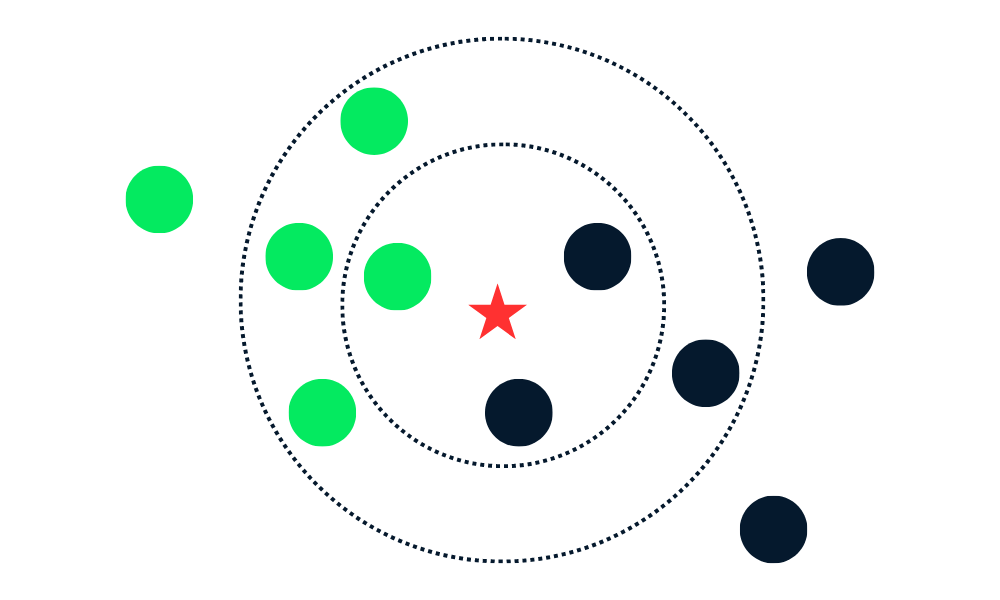

**Our main objective to use ML is for predictibility. In simpler words(for classification problem) we want to correctly specify a new data points to it's actuall class where it belongs!** Every algorithm has their different approaches to do this task. But KNN use such a simple idead here! For a unknown point it just basically choose some other points which are near to it and then do majority count. The number of other points we choose which are near to the unknown point is called 'neighbors' Let's try to understand this with a real life example. As human being we all live in a society. Where there are many other people around us. We call them 'neighbors' because they live near to us. Obviously you won't consider anyone as neighbor if you live in a city 'A' and they live in a different city 'B'. We will only consider those people who resides near you. Likewise we are referring to the points as neighbors which are near to the unknown point. In different situation we need different number of neighbors (Let's say K).

So why K? - Becasue we want to find k points that are nearest to the unknown point.

So why nearest? - Because we are concerned with only those points which have least distance from the unknown point.

So why neighbors? - Since we want the closest points of the unknown point.

Now you may wonder how to find out which points are nearer? The answer is pretty simple, to find the nearer points we just have to calculate the Eucledian distances of all points from the unknown points and then we will sort the distance values in ascending order (smallest to largest) so after sorting if we take first 3 values, they are the top 3 nearest points from the unknown point.Since we are taking 3 nearest points so number of neighbors is 3 (K=3). If we take 5 nearest points then number of neighbors is 5 (K=5) and so on. 


Let's understand the whole concept from the above figure and try to match what we have just learnt with the figure.
Here the red star point is the unknown points I mean we want to know in which class this point belongs. Here all the green points representing a class (**Let's say class P**) and all the black points representing another class (**Let's say class Q**). Now we want to know whether the red star point belongs to Class P or Class Q. To find this, we first need to find out which points are near to red star point. As I mentioned to find the answer which points are nearer we have to find out the Eucledian distances of every black and green points from the red star point. Now let's say we will consider 3 nearest points (**number of neighbors,K=3**) and for visual understanding,look at the figure the inner circle is representing the 3 points which are the nearest to the red points. Okay as we find out the nearest points, what we have to do now? We will count the majority. See in the inner circle, among 3 neighbors 2 are black and 1 is green points. So we will go for the majority that means since black points are more than green (in the case of K=3) we will **classify the red star points to be in the Class Q**. Now let's increase the number of neighbors, **let's take K=7**. Now look at the outer circle of the figure. Now let's count which has the majority count. So for outer circle, number of green points is 4 and number of black points is 3. So in majority counts,among 7 neighbors of the red star point, 4 of them are green which is greater than the black points(3), **we will classify the red star point to be in   Class P.**

**That's why this algorithm is called K-Nearest Neighbors. Hope you get the idea!**

**N.B. You can see that we are using the concept in 2D because it is easy to represent and understand but KNN can also used in multi-dimensions.**

**Most of the cases we use Eucledian distance.But in some specific problems,Manhattan distance and other distances are also used. The formula to calculate Eucledian distance is given by,**

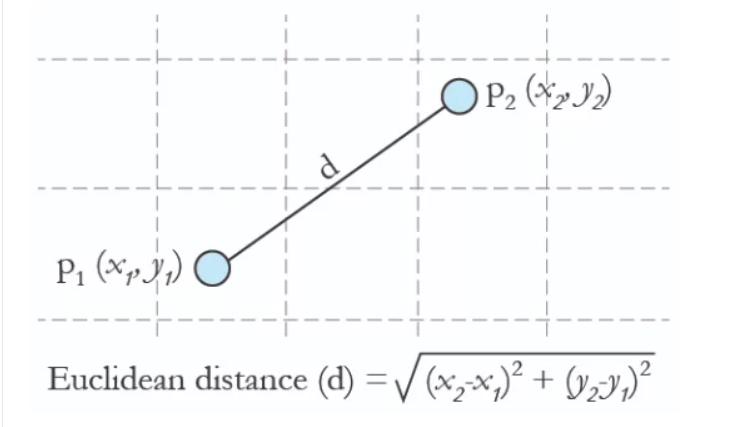

# Assumptions of KNN

1. **Local Smoothness:** KNN assumes that data points that are close to each other in the feature space have similar target values. In other words, it assumes local smoothness in the data.

2. **Feature Relevance:** KNN assumes that all features are equally relevant. It treats all features with equal importance when calculating distances between data points.

3. **Noisy Data:** KNN can be sensitive to noisy data and outliers, as it considers the entire neighborhood of a data point. Outliers can have a significant impact on the classification.

4. **Choice of K:** The performance of KNN can be influenced by the choice of the parameter 'K,' which represents the number of neighbors to consider. A small 'K' may be sensitive to noise, while a large 'K' may smooth out local patterns.

5. **Distance Metric:** The algorithm assumes an appropriate distance metric for measuring the similarity between data points. The choice of distance metric (Euclidean, Manhattan, etc.) can impact the results.

6. **Curse of Dimensionality:** In high-dimensional spaces, the concept of proximity becomes less meaningful, and the algorithm may struggle to find meaningful neighbors. Feature scaling and dimensionality reduction techniques can help mitigate this issue.

7. **Imbalanced Data:** KNN can be affected by imbalanced datasets, where one class has significantly more instances than another. The majority class may dominate predictions.

<a id="1"></a> <br>

# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Problem Statement</div>


**Given measurements of sepal length, sepal width, petal length, and petal width for iris flowers, the objective is to develop a machine learning model(KNN) that can accurately classify the flowers into one of three species: setosa, versicolor, or virginica.**


# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Necessary Libraries & Utilities</div>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Data Preprocessing</div>




In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**sepal_length** : Represents the length of the iris flower's sepal (the outermost part of the flower) in centimeters.

**sepal_width** : Represents the width of the iris flower's sepal in centimeters.

**petal_length** : Represents the length of the iris flower's petal (the inner part of the flower) in centimeters.

**petal_width** : Represents the width of the iris flower's petal in centimeters.

**species** : Represents the species of the iris flower.Three possible values: Setosa, Versicolor, Virginica.
This column is the target variable in classification tasks, and the goal is to predict the species based on the sepal and petal measurements.

<a id="4"></a> <br>

# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Diving deep into the Dataset
</div>


In [3]:
# Overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

**That means there are total 150 rows and 5 columns**

In [5]:
# Checking if there is any null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

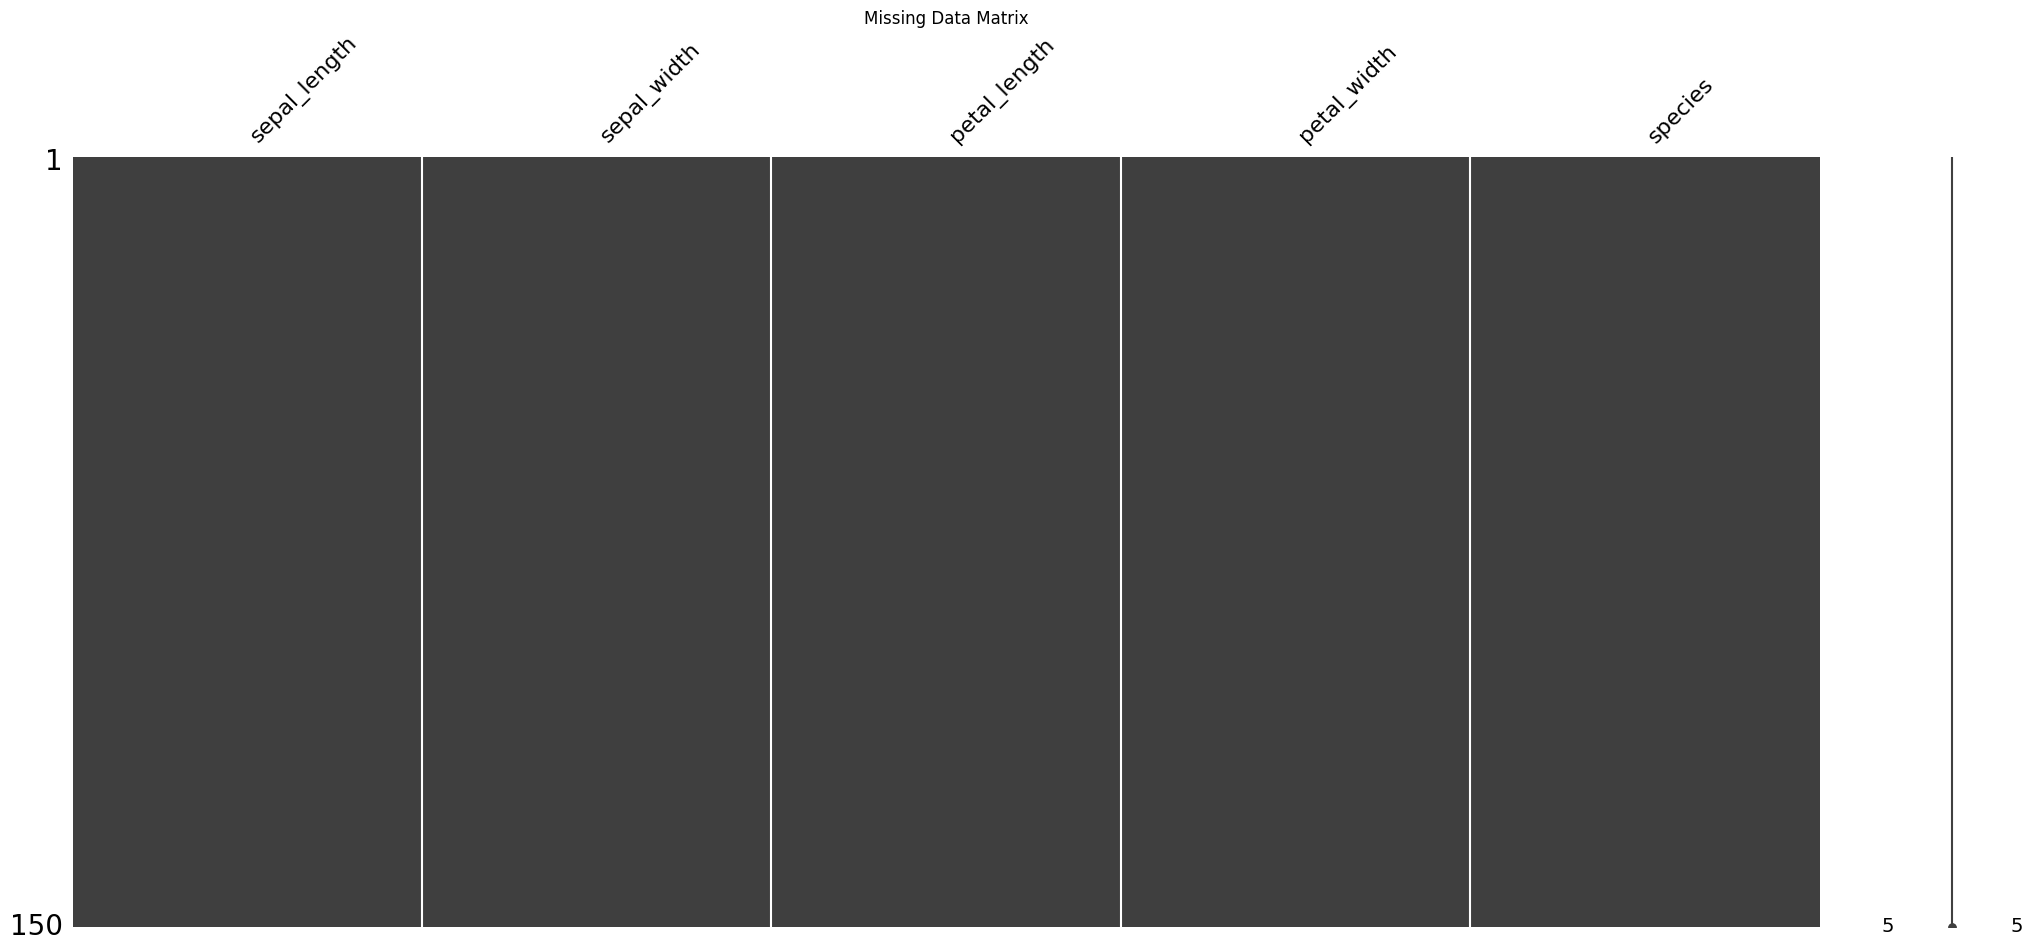

In [6]:
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

**There is no null values in any column.**

In [7]:
# Checking if there is any duplicated values

df.duplicated().sum()

3

**There is 3 duplicated values, let's drop them**

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
# Statistical summary of continuous variables

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df2 = df.drop('species',axis=1)
df3 = df.copy()

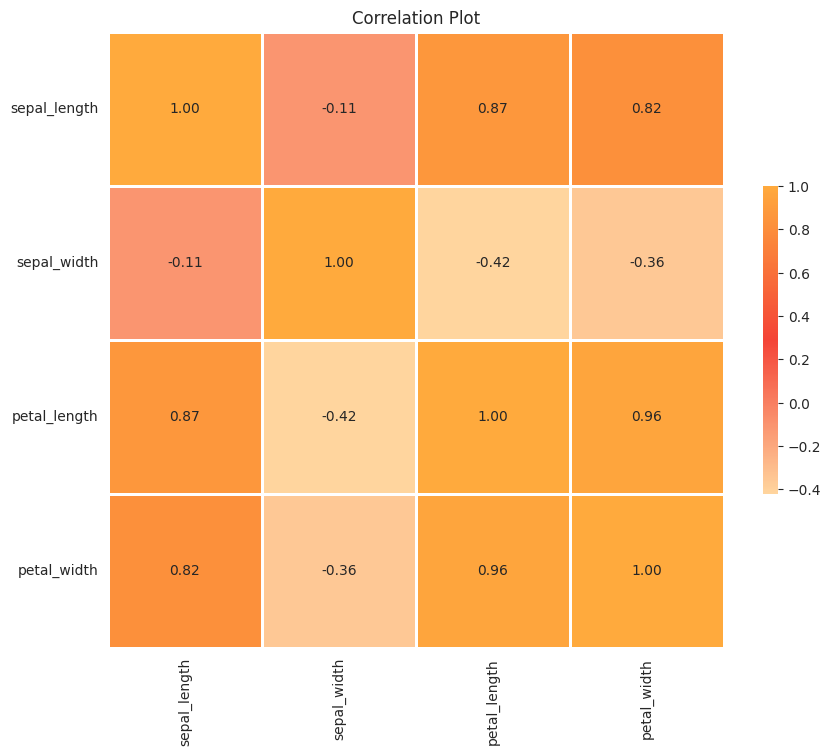

In [11]:
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = ['#ffd59e', '#f44336', '#ffaa3d']  
colormap = plt.cm.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=colormap,
            cbar_kws={"shrink": .5}, square=True,
            linewidths=1, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Plot")
plt.show()


<a id="4"></a> <br>

# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Distribution of features
</div>


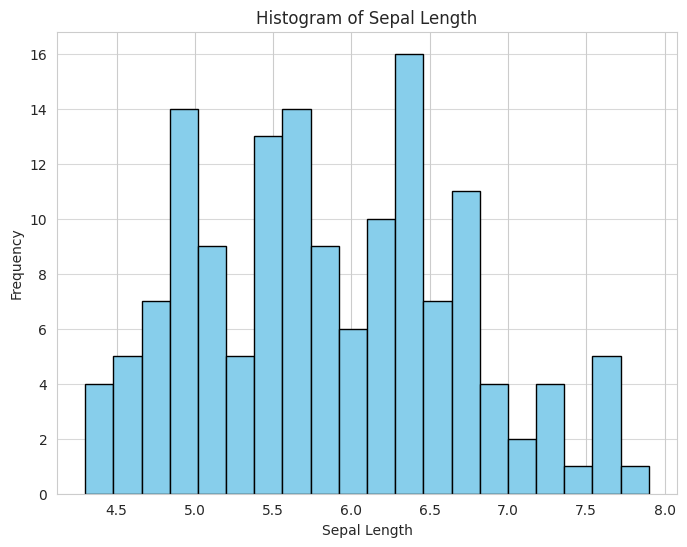

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


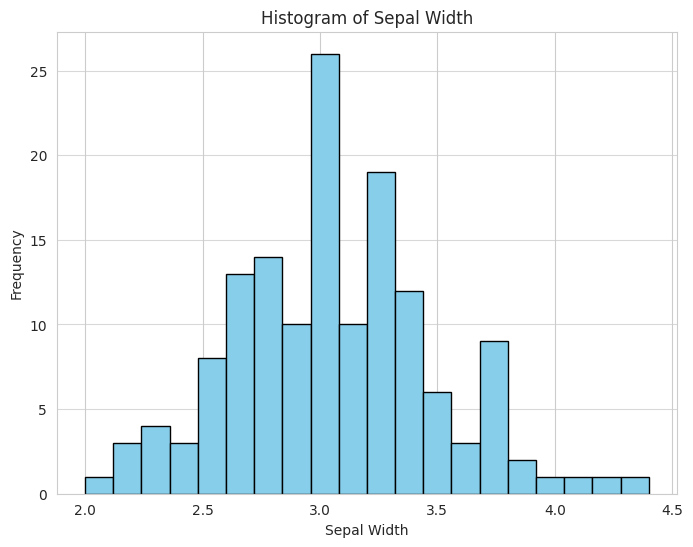

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_width'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


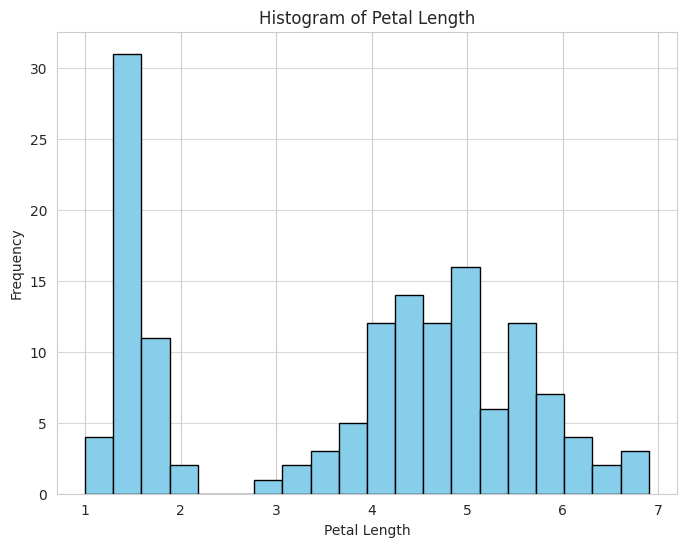

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['petal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


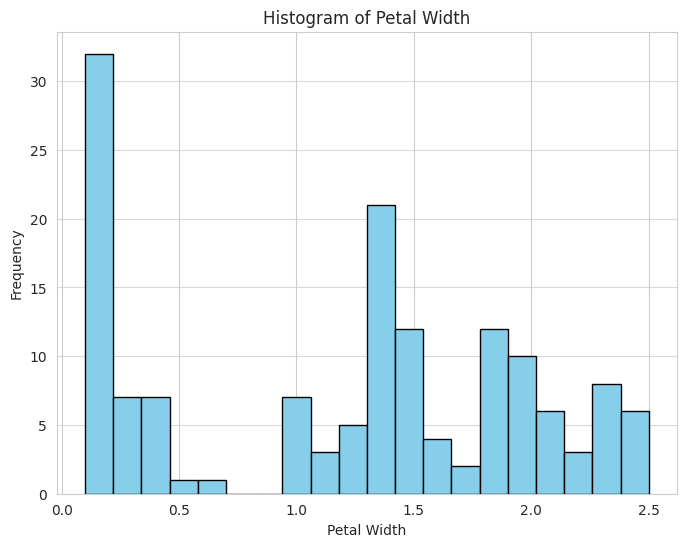

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['petal_width'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Petal Width")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


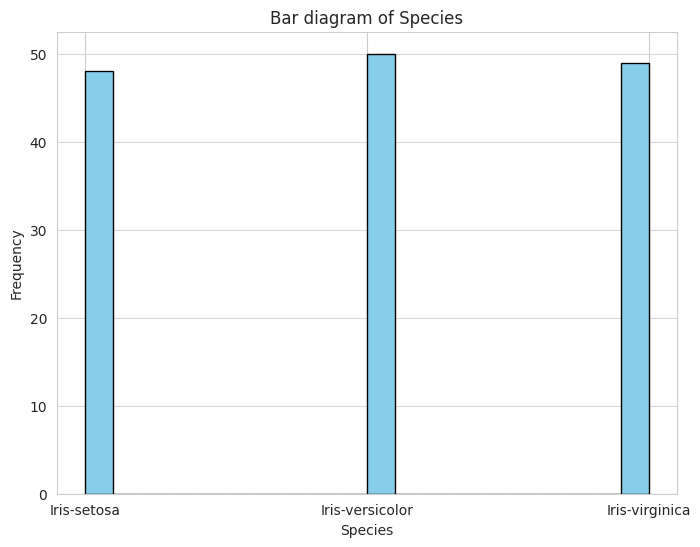

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['species'], bins=20, color='skyblue', edgecolor='black')
plt.title("Bar diagram of Species")
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


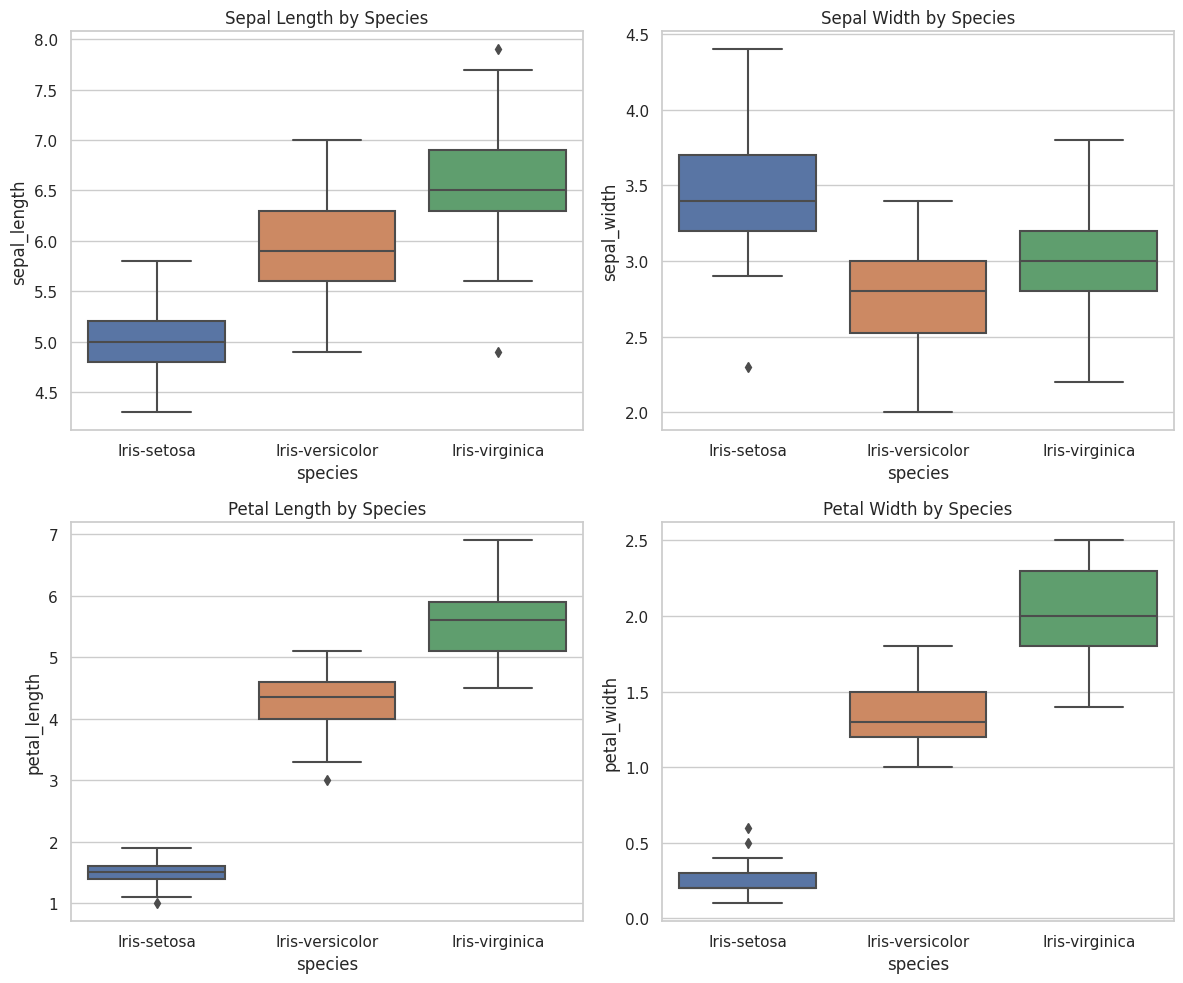

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x="species", y="sepal_length", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length by Species')
sns.boxplot(x="species", y="sepal_width", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width by Species')
sns.boxplot(x="species", y="petal_length", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')
sns.boxplot(x="species", y="petal_width", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width by Species')
plt.tight_layout()
plt.show()

<a id="4"></a> <br>

# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Implementing KNN on the iris dataset
</div>


In [18]:
X = df.drop('species',axis=1)
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=25)

**It is always suggested that, while working with KNN you convert your data in same scale because KNN is based on distance, some of your variable may be scaled in 1000's scale some of them may be in 10's scale so using KNN is not efficient for this, So we standardize the data to convert all the data in the same scale.We do standardization by subtracting the data points from mean of the variable and dividing by standard deviation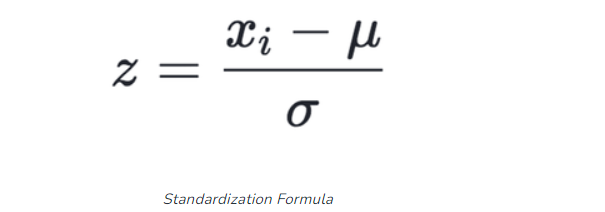**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.42921411, -1.98214286,  0.42411963,  0.40842844],
       [ 0.55259998, -0.82142857,  0.65491962,  0.8077554 ],
       [-1.05141638,  0.33928571, -1.47998025, -1.32198842],
       [-0.9280305 ,  0.57142857, -1.19148027, -0.92266146],
       [-0.55787288,  1.96428571, -1.42228025, -1.05577044],
       [-0.9280305 ,  1.03571429, -1.36458026, -1.32198842],
       [-1.79173162, -0.35714286, -1.36458026, -1.32198842],
       [-1.05141638, -0.125     , -1.24918026, -1.32198842],
       [ 0.42921411, -0.35714286,  0.30871964,  0.14221046],
       [ 1.04614348,  0.57142857,  1.11651959,  1.20708237],
       [-0.43448701,  2.66071429, -1.36458026, -1.32198842],
       [-0.80464463,  1.03571429, -1.30688026, -1.32198842],
       [ 0.79937173, -0.125     ,  1.00111959,  0.8077554 ],
       [ 0.79937173, -0.125     ,  1.17421958,  1.34019136],
       [-1.05141638,  0.80357143, -1.30688026, -1.32198842],
       [-1.29818812, -0.125     , -1.36458026, -1.45509741],
       [-0.06432939, -0.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [24]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8666666666666667

**So our accuacy is basically almost 87%**

# What is the optimum value of K?

You might wonder how many neighbors (K) should we take? 

Honestly, there isn't any one-size-fits-all optimum value of K which will always lead you to the best performance. It solely depends on the data you are working on. In every case different different k values would be optimum. So is there any way to find the optimum value of K in my dataset? The answer is 'Yes'. There are 2 ways to find this.

* Heuristic approach
* Experimentation 

Before start discussing details about these two approaches let's just clarify a thing. I think you've already understood why we are taking the odd values of K, not the even values. Because just think for a moment. If we take number of neighbors (K=6) which is an even number, what would happen? A case could happen that in majority counts number of green points are three and number of black points are also 3, so what class would we assign the red star point then? since we have same number of points as neighbors of each class. To avoid these kinds of problem we generally take the odd values of K. Now let's discuss the two approaches.

* Heuristic approach : You can say this method as 'Educated strategy'. I mean in this approach we just use short-cuts and easy strategies rather than going into the complexity of the problem. In heuristic approach, to find the value of K we use √(number of observations) (square root of number of observations) that means let's say you have total 225 observations so the value of K is √225 = 15 . 
* Experimentation : This approach is much logical and appropriate to use. We use cross-validation. Let's say you have  1000 observation and you divide them in train(80% - 800 observations) and test (20% - 200 observations) and you take let's say 25 different KNN models with K values from 1 to 25. We will try to understand this experimentation approach through a code example.

In [25]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test,y_pred))
print(scores)

[0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9]


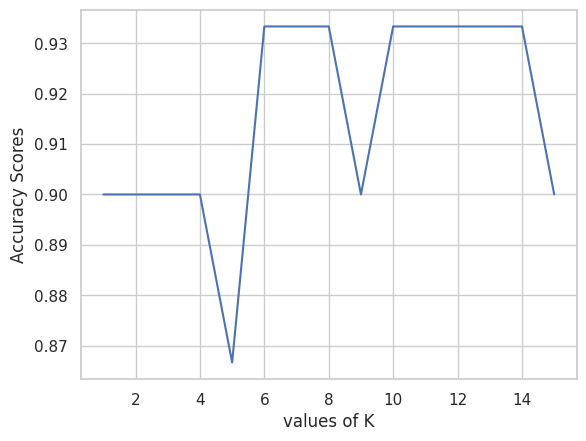

In [26]:
plt.plot(range(1,16),scores)
plt.xlabel("values of K")
plt.ylabel("Accuracy Scores")
plt.show()

So we are getting most accuracy in any one of K=6,7,8,10,11,12,13,14. 


# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Overfitting and Underfitting in KNN</div>




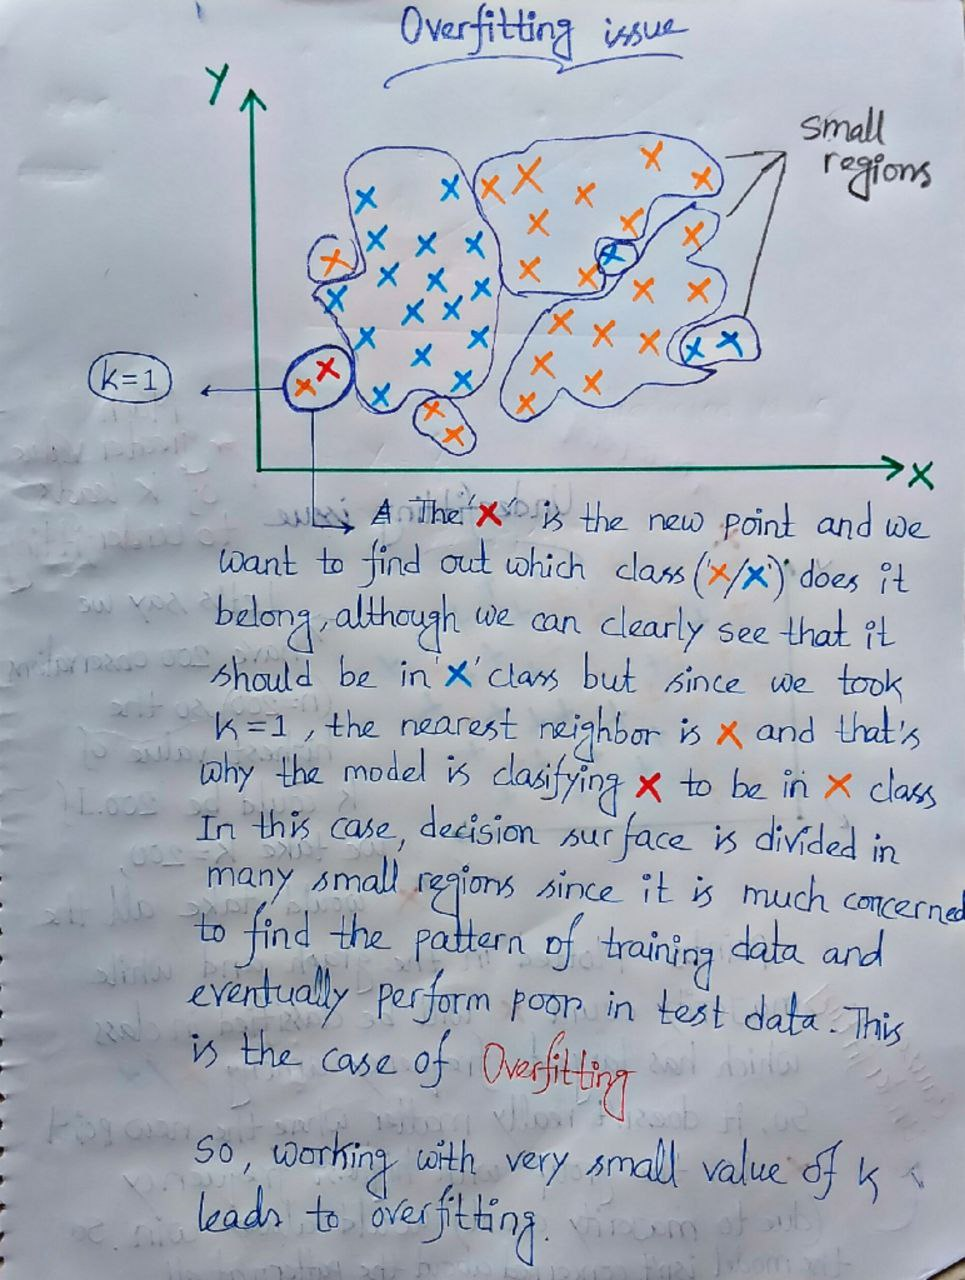

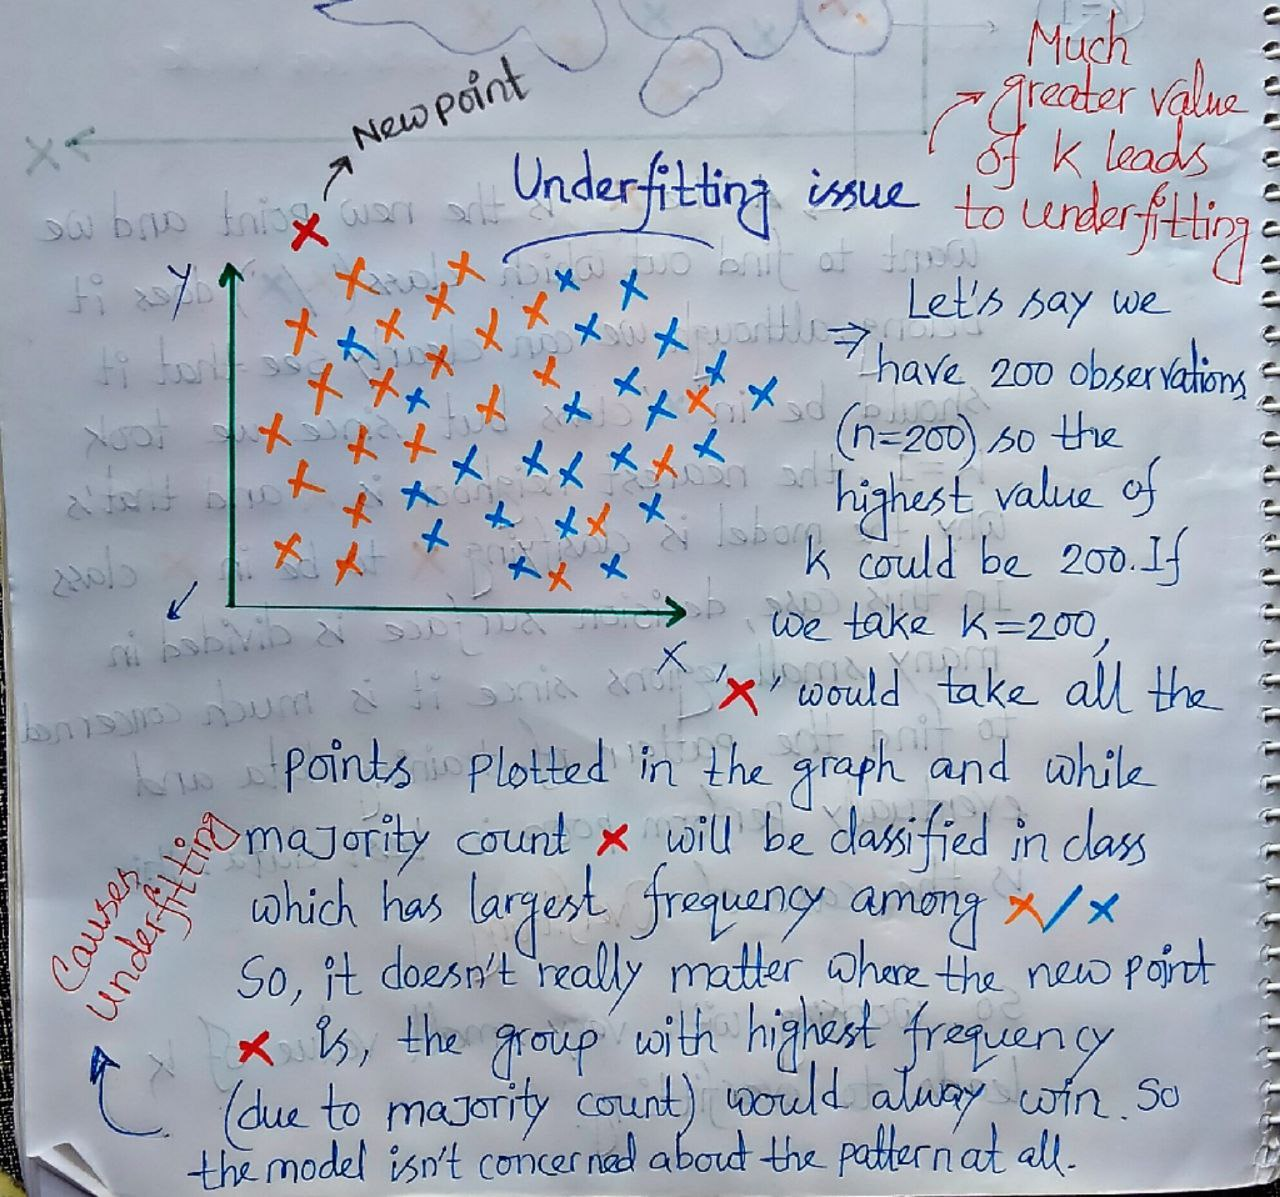


# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Decision Boundary in KNN</div>




In [27]:
#  This portion of code is collected from the code of another kaggler (Nitish Singh)

from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed


def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…


# <div style="background-color:#000; color:white; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Limitations of KNN</div>




1. **Computational Cost:** KNN has high computational cost during the testing phase, especially as the size of the dataset increases. This is because it requires a comparison of the query instance with all training instances.

2. **Memory Usage:** KNN needs to store the entire training dataset in memory during the testing phase. For large datasets, this can lead to high memory usage.

3. **Sensitive to Noise and Outliers:** KNN is sensitive to noisy data and outliers in the dataset. A single outlier can significantly impact the decision boundary.

4. **Choosing the Right Value of K:** The choice of the parameter 'k' (the number of neighbors) can affect the model's performance. A small 'k' may make the model sensitive to noise, while a large 'k' may lead to underfitting.

5. **Feature Scaling:** KNN is sensitive to the scale of features. If features have different scales, the algorithm may give more importance to features with larger scales.

6. **Imbalanced Data:** In datasets with imbalanced classes, KNN tends to favor the majority class. The predictions can be biased toward the class with more instances.

7. **Curse of Dimensionality:** As the number of features (dimensions) increases, the distance between instances also increases. This can lead to a degradation of KNN's performance in high-dimensional spaces.

8. **Localized Decision Boundary:** KNN tends to create localized decision boundaries based on the distribution of training instances. This may not capture the true underlying patterns if the distribution is not representative.

9. **No Training Phase:** KNN does not have a training phase; it simply stores the entire dataset. This means it may not adapt well to changes in the data distribution over time.

Despite these limitations, KNN can still be a useful algorithm, especially for small to moderately sized datasets with relatively low dimensionality. It is often used as a baseline or in situations where interpretability and simplicity are valued over computational efficiency.

<div style="background-color:black; color:white; padding:20px; font-size:24px; font-weight:bold; text-align:left; border-radius:70px;"> 
      If this notebook helps, please consider UPVOTING. Happy learning! 😊 
</div>
